<h1>Model Building and Training</h1>

In [2]:
# Data Manipulation Libraries
import pandas as pd 
import numpy as np
from scipy import stats

# Plotting Libraries
import matplotlib.pyplot as plt

#ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from tabulate import tabulate
import mlflow
import mlflow.sklearn
from mlflow.tracking import MlflowClient

In [3]:
# Load the dataset
Creditcard_data = pd.read_csv('C:\\Users\\Tsi\\Desktop\\10academy\\Week8\\data\\creditcard.csv',low_memory=False)
fraud_data = pd.read_csv('C:\\Users\\Tsi\\Desktop\\10academy\\Week8\\data\\Fraud_Data.csv',low_memory=False)
IpAddress_data = pd.read_csv('C:\\Users\\Tsi\\Desktop\\10academy\\Week8\\data\\IpAddress_to_Country.csv',low_memory=False)

<h1>Overview the data</h1>

<h2>Fraud_data</h2>

In [4]:
# Display the first few rows of the dataset
print("First few rows of the Fraud_data dataset:")
print(fraud_data.head())

First few rows of the Fraud_data dataset:
   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  


In [5]:
# Inspect columns of fraud_data
print("Columns in fraud_data:", fraud_data.columns)

Columns in fraud_data: Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')


<h2>Creditcard_data</h2>

In [6]:
# Display the first few rows of the dataset
print("First few rows of the creditcard_data dataset:")
print(Creditcard_data.head())

First few rows of the creditcard_data dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267

In [7]:
# Inspect columns of creditcard_data
print("Columns in Creditcard_data:", Creditcard_data.columns)

Columns in Creditcard_data: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


<h1>Data Preparation:</h1>

<h2>Handeling missing values</h2>

In [8]:
# Check for missing values in Fraud_data
print("\nMissing Values in Fraud Data:")
print(fraud_data.isnull().sum())


Missing Values in Fraud Data:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


In [9]:
# Check for missing values in creditcard_data
print("\nMissing Values in creditcard_data:")
print(Creditcard_data.isnull().sum())


Missing Values in creditcard_data:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


<h2>Checking for outliers</h2>

Outliers in column 'user_id': 0


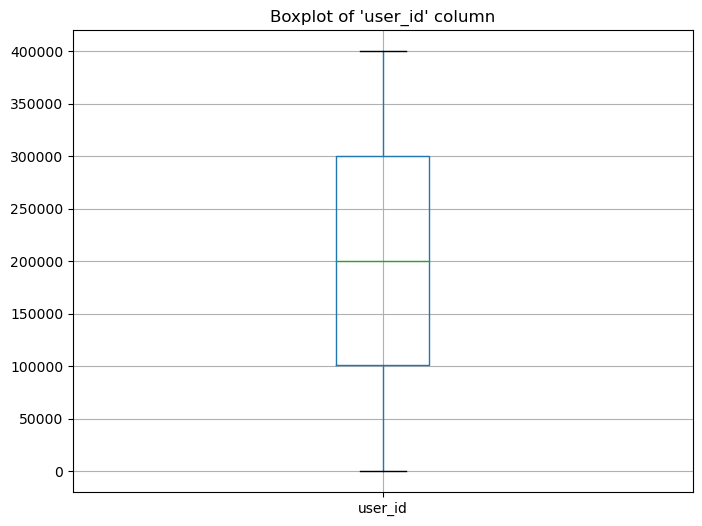

Outliers in column 'purchase_value': 865


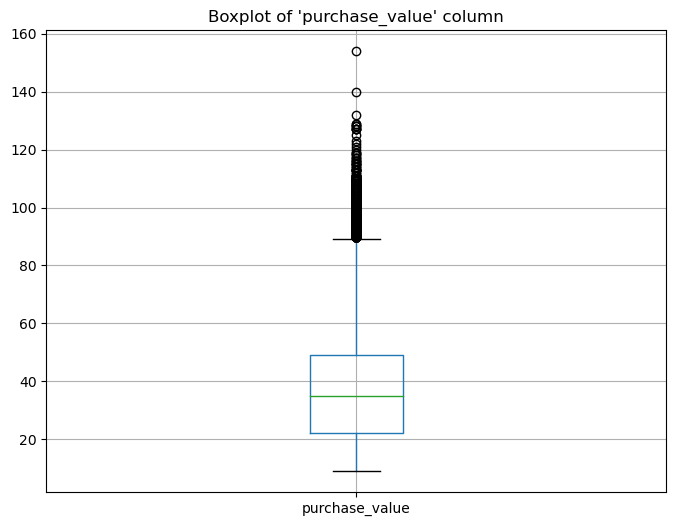

Outliers in column 'age': 553


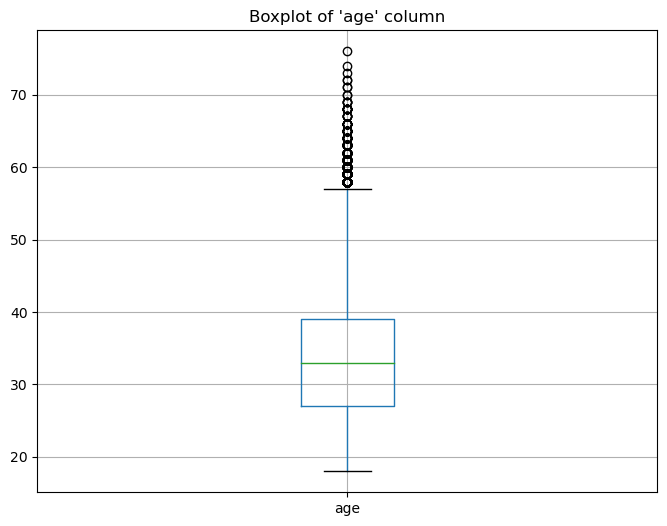

Outliers in column 'ip_address': 0


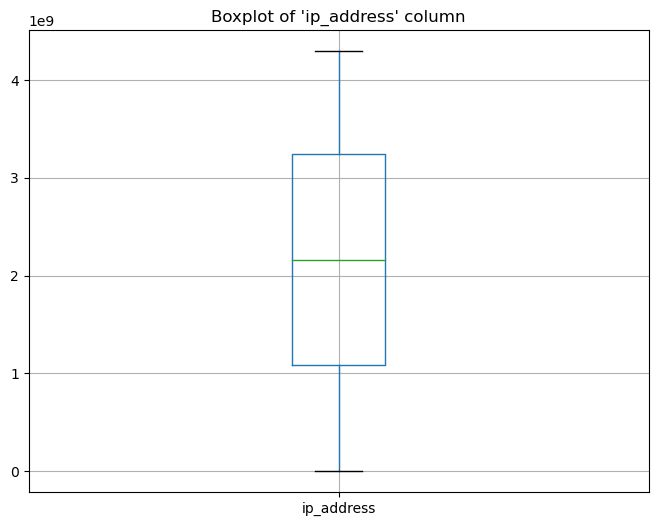

Outliers in column 'class': 14151


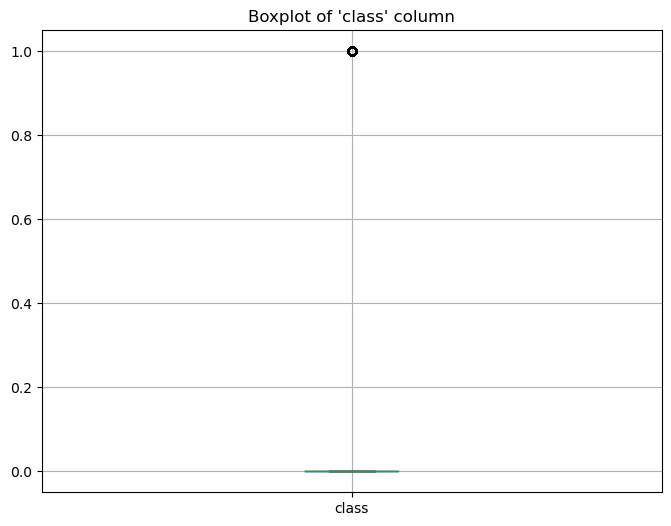

In [10]:
#check for the outliers for fraud and creditcard datasets

# Check for outliers in each numerical column
for col in fraud_data.select_dtypes(include=['int64', 'float64']).columns:
    # Calculate the z-score for each value in the column
    z = np.abs(stats.zscore(fraud_data[col]))
    
    # Identify the outliers (z-score > 3)
    outliers = fraud_data[z > 3][col]
    print(f"Outliers in column '{col}': {len(outliers)}")
    
    # Plot a boxplot to visualize the outliers
    plt.figure(figsize=(8, 6))
    fraud_data.boxplot(column=col)
    plt.title(f"Boxplot of '{col}' column")
    plt.show()

In [11]:
#checkmg datatypes

fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [12]:
# Convert datetime strings to datetime objects
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# Extract useful datetime components
fraud_data['signup_hour'] = fraud_data['signup_time'].dt.hour
fraud_data['signup_day'] = fraud_data['signup_time'].dt.dayofweek
fraud_data['purchase_hour'] = fraud_data['purchase_time'].dt.hour
fraud_data['purchase_day'] = fraud_data['purchase_time'].dt.dayofweek

# Drop the original datetime columns
fraud_data = fraud_data.drop(columns=['signup_time', 'purchase_time','device_id'])

In [13]:
#checkmg datatypes

fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   purchase_value  151112 non-null  int64  
 2   source          151112 non-null  object 
 3   browser         151112 non-null  object 
 4   sex             151112 non-null  object 
 5   age             151112 non-null  int64  
 6   ip_address      151112 non-null  float64
 7   class           151112 non-null  int64  
 8   signup_hour     151112 non-null  int32  
 9   signup_day      151112 non-null  int32  
 10  purchase_hour   151112 non-null  int32  
 11  purchase_day    151112 non-null  int32  
dtypes: float64(1), int32(4), int64(4), object(3)
memory usage: 11.5+ MB


<h2>Encoding</h2>

In [14]:
# Define preprocessing for numerical and categorical features
numeric_features = ['purchase_value', 'age']  # Example numeric features
categorical_features = ['source', 'browser', 'sex','signup_hour','signup_day', 'purchase_hour', 'purchase_day']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

StandardScaler is used to standardize the numerical features in a dataset, making them zero-mean and unit-variance.
OneHotEncoder is used to transform categorical features into a numerical format that can be processed by machine learning algorithms.

<h2>Separate Features and Target Variables</h2>

In [15]:
#Feature and Target Separation [‘Class’(creditcard), ‘class’(Fraud_Data)]

# For fraud_data
fraud_X = fraud_data.drop(columns=['class'])
fraud_y = fraud_data['class']
# For creditcard_data
creditcard_X = Creditcard_data.drop(columns=['Class'])
creditcard_y = Creditcard_data['Class']

<h2>Train-Test Split</h2>

In [16]:
# Split fraud_data
fraud_X_train, fraud_X_test, fraud_y_train, fraud_y_test = train_test_split(fraud_X, fraud_y, test_size=0.2, random_state=42)

# Split creditcard_data
creditcard_X_train, creditcard_X_test, creditcard_y_train, creditcard_y_test = train_test_split(creditcard_X, creditcard_y, test_size=0.2, random_state=42)
     

<h1>Model selection and training</h1>

Logistic Regression

In [19]:
# Model Selection
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'MLP': MLPClassifier()
}

In [20]:
# Function to train and evaluate models
def train_evaluate_model_fraud(model_name, model, X_train, X_test, y_train, y_test):
    # Create a pipeline with preprocessing and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Log metrics with MLflow
    with mlflow.start_run(run_name=model_name):
        mlflow.log_param("model", model_name)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)
        mlflow.sklearn.log_model(pipeline, model_name)

    return {
        'model': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }


In [21]:
#Train and evaluate models on fraud data
fraud_results = []
for model_name, model in models.items():
    fraud_results.append(train_evaluate_model(model_name, model, fraud_X_train, fraud_X_test, fraud_y_train, fraud_y_test))

 # Display results
fraud_results_df = pd.DataFrame(fraud_results)
print("Fraud Data Results:\n", fraud_results_df)

F:\code\installation\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\code\installation\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
F:\code\installation\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fraud Data Results:
                  model  accuracy  precision    recall  f1_score
0  Logistic Regression  0.905701   0.000000  0.000000  0.000000
1        Decision Tree  0.906991   0.506181  0.560351  0.531890
2        Random Forest  0.956060   0.993515  0.537544  0.697632
3    Gradient Boosting  0.907653   0.927536  0.022456  0.043851
4                  MLP  0.947590   0.847039  0.542105  0.661104


In [24]:
# Define models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    MLPClassifier(),
    
]

# Train and evaluate models
results = []
for model in models:
    with mlflow.start_run():
        mlflow.log_param('model', model.__class__.__name__)
        model.fit(creditcard_X_train, creditcard_y_train)
        y_pred = model.predict(creditcard_X_test)
        accuracy = accuracy_score(creditcard_y_test, y_pred)
        precision = precision_score(creditcard_y_test, y_pred)
        recall = recall_score(creditcard_y_test, y_pred)
        f1 = f1_score(creditcard_y_test, y_pred)
        mlflow.log_metric('accuracy', accuracy)
        mlflow.log_metric('precision', precision)
        mlflow.log_metric('recall', recall)
        mlflow.log_metric('f1', f1)
       
    results.append([
        model.__class__.__name__,
        f"{accuracy:.3f}",
        f"{precision:.3f}",
        f"{recall:.3f}",
        f"{f1:.3f}"
    ])

headers = ["Model", "Accuracy", "Precision", "Recall", "F1"]
print(tabulate(results, headers, tablefmt="grid"))

   

F:\code\installation\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


+----------------------------+------------+-------------+----------+-------+
| Model                      |   Accuracy |   Precision |   Recall |    F1 |
+============================+============+=============+==========+=======+
| LogisticRegression         |      0.999 |       0.659 |    0.612 | 0.635 |
+----------------------------+------------+-------------+----------+-------+
| DecisionTreeClassifier     |      0.999 |       0.697 |    0.776 | 0.734 |
+----------------------------+------------+-------------+----------+-------+
| RandomForestClassifier     |      1     |       0.962 |    0.776 | 0.859 |
+----------------------------+------------+-------------+----------+-------+
| GradientBoostingClassifier |      0.999 |       0.738 |    0.602 | 0.663 |
+----------------------------+------------+-------------+----------+-------+
| MLPClassifier              |      0.998 |       0.515 |    0.173 | 0.26  |
+----------------------------+------------+-------------+----------+-------+